# Quantum Teleportation

Alice wants to send quantum information to Bob. Specifically, she wants to send the qubit state $\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 


By taking advantage of two classical bits and an entangled qubit pair, Alice can transfer their state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore.
 

## Imports

In [1]:
from qiskit import *

## 1. Create the quantum circuit

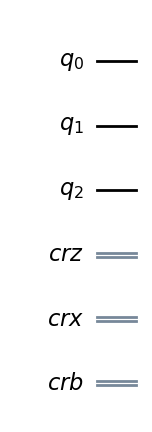

In [2]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
crb = ClassicalRegister(1, name="crb") # third party register is included for measuring Bob's result
teleportation_circuit = QuantumCircuit(qr, crz, crx, crb)
teleportation_circuit.draw("mpl", cregbundle=False) # using cregbundle so that each classical bit is drawn as a separate line/wire in the circuit diagram

## 2. Create an entangled pair

In [3]:
# a is Alice's qubit and b is given to Bob
def create_bell_pair(qc, a, b):
    qc.h(a) 
    qc.cx(a, b)  

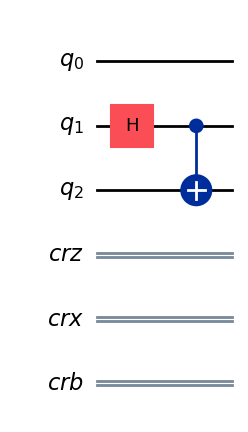

In [4]:
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw("mpl", cregbundle=False)

## 3. Alice needs to entangle her unknown qubit $|\psi \rangle$ (the one she wants to teleport) with her half of the entangled pair $a$.

In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

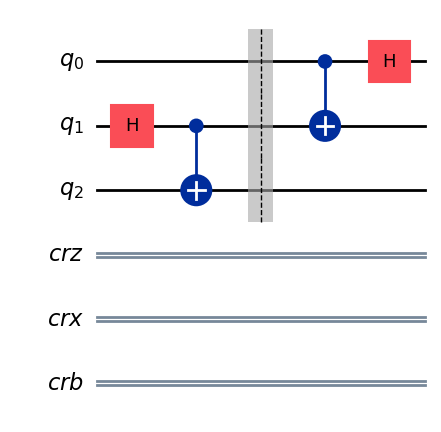

In [6]:
teleportation_circuit.barrier()  # barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw("mpl", cregbundle=False)

## 4. Next, Alice applies a measurement to both qubits she owns,  $q_1$,  $\vert\psi\rangle$, and stores this result in two classical bits. Then send these two bits to Bob.

In [7]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)

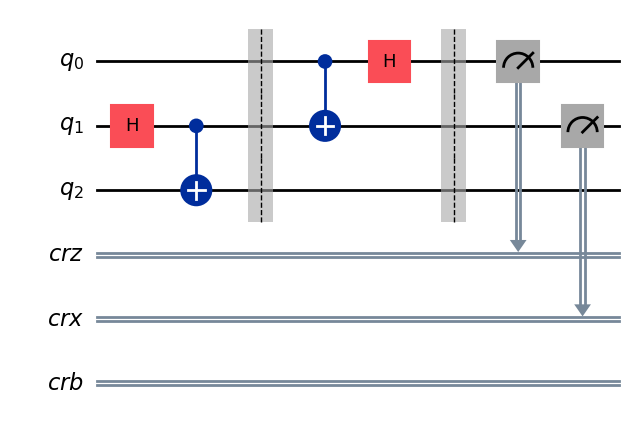

In [8]:
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw("mpl", cregbundle=False)

## 5. Bob's qubit contains the original unknown state, but with possible bit-flip and phase-flip errors.

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

In [9]:
def bob_gates(qc, qubit, crz, crx):
    with qc.if_test((crx,1)):
        qc.x(qubit)
    with qc.if_test((crz,1)):
        qc.z(qubit)

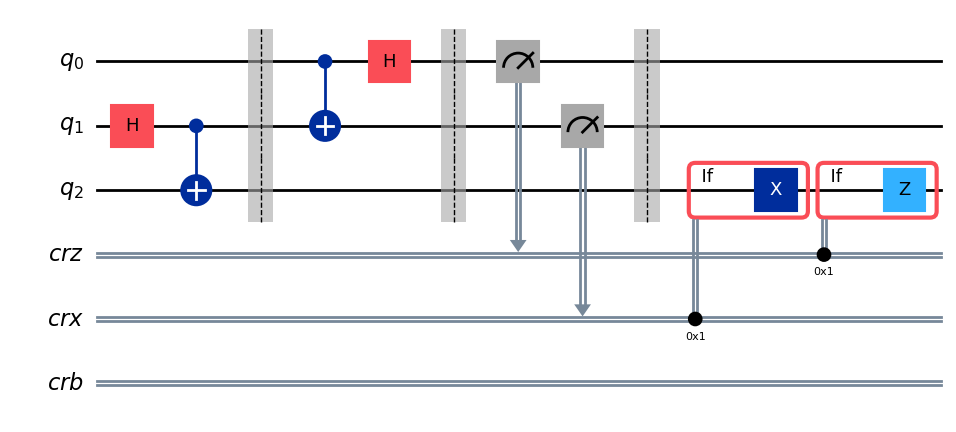

In [10]:
teleportation_circuit.barrier()  # barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw("mpl", cregbundle=False)

## 6. Finally, Bob measures their qubit to verify the teleportation of Alice's qubit state.

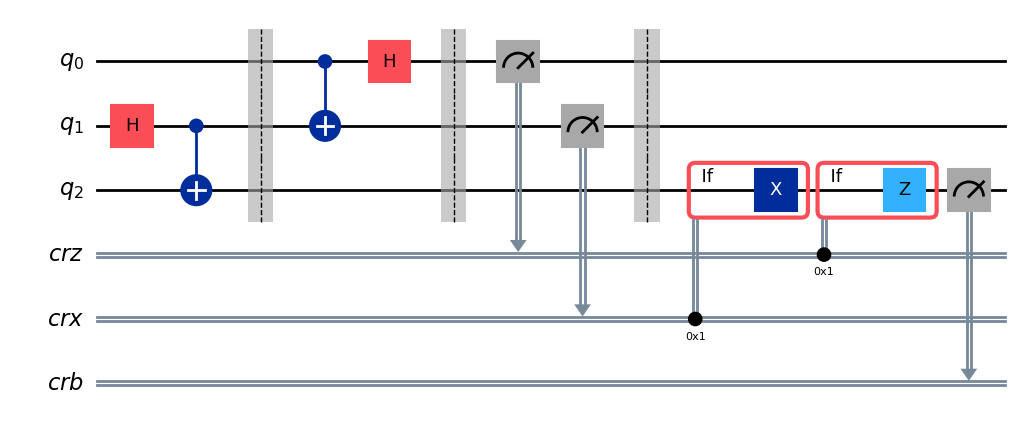

In [11]:
crb = ClassicalRegister(1, name="crb")
teleportation_circuit.measure(2, 2)
teleportation_circuit.draw("mpl", cregbundle=False)